# Housing Feature Exploration and Processing

## Import Packages and Load dataset

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
pd.set_option("display.max_columns", 101)

In [2]:
# Load train dataset
df_train = pd.read_csv('./train.csv')
df_test2 = pd.read_csv('./test.csv')

## Overview of Dataset

In [3]:
# View a Sample
df_train.sample(10)
df_test2.sample(10)

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
5854,28584,40911,79,1,1,38,57330,8,8,2000,0,0,2074,6335,842,1,7
8768,31498,66169,55,0,0,66,61958,2,8,1993,0,0,3401,3120,239,0,7
2908,25638,38148,64,1,0,58,79444,3,5,2000,0,0,7812,6597,799,0,5
6733,29463,416,61,0,1,89,84464,8,8,1996,1,0,6427,786,786,0,3
491,23221,32604,61,1,0,51,85386,4,1,2009,0,0,7253,6202,614,1,4
1616,24346,16354,8,1,1,33,61859,5,8,2019,1,0,3426,9562,866,0,7
9848,32578,60886,38,1,0,37,17649,4,2,2005,0,0,3734,273,221,0,0
11634,34364,42623,89,1,0,23,94278,10,1,2009,1,1,4683,7536,218,0,8
1157,23887,24280,28,0,0,36,84667,5,5,1998,0,1,2978,2626,946,0,2
13116,35846,39799,22,1,0,34,20800,6,9,1993,0,1,9251,9751,861,1,2


In [4]:
df_train.shape
df_test2.shape

(15154, 17)

In [5]:
df_train.columns

Index(['id', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [6]:
# Check for duplicated values
print('Duplicated train values:', df_train.duplicated().sum())
print('Duplicated test values:', df_test2.duplicated().sum())

Duplicated train values: 0
Duplicated test values: 0


### Merge Datasets for Processing

In [8]:
# Drop ID Column
df_train = df_train.drop(columns=['id'])
df_test = df_test2.drop(columns=['id'])

In [9]:
# Create a set variable to differnetiate between train and test
df_train['section'] = "Train"
df_test['section'] = "Test"

In [10]:
# Create a Sale Price column for df_test and set to 0 as a placeholder
df_test['price'] = 0

In [11]:
# Stack the datasets
df = pd.concat([df_train, df_test], ignore_index=True, axis = 0, sort = False)

## Missing Values & Imputation

Text(0.5, 1.0, 'Missing Values by Feature')

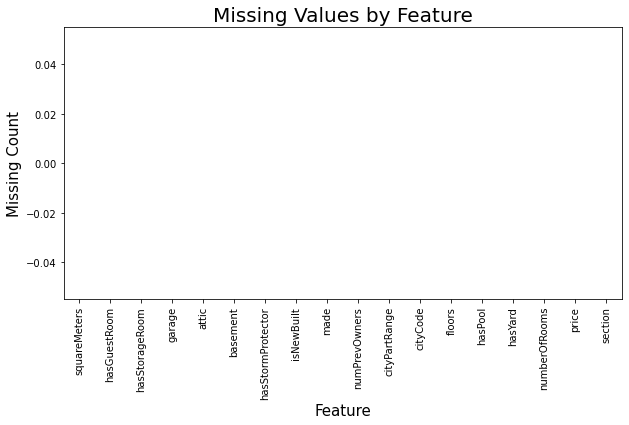

In [15]:
# Check for Columns with NA values
missing = df.isnull().sum()

# Vizualize missing value count
missing = missing[missing >= 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (10,5))
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Missing Count',fontsize = 15)
plt.title('Missing Values by Feature', fontsize=20)

In [16]:
# Check Number of missing numerically
print(missing)

df[df['price'] == 0].shape

squareMeters         0
hasGuestRoom         0
hasStorageRoom       0
garage               0
attic                0
basement             0
hasStormProtector    0
isNewBuilt           0
made                 0
numPrevOwners        0
cityPartRange        0
cityCode             0
floors               0
hasPool              0
hasYard              0
numberOfRooms        0
price                0
section              0
dtype: int64


(15154, 18)

### Ordinal Encoding

In [22]:
ordinal = df[['hasYard', 'hasPool', 'cityPartRange', 'numPrevOwners', 'isNewBuilt','hasStormProtector', 'hasGuestRoom']].copy()

In [23]:
# Create a dictionary of all ordinal values
temp = {}

for col in ordinal:
    temp[col] = ordinal[col].unique().tolist()

In [24]:
# Take a look at Values
temp

{'hasYard': [1, 0],
 'hasPool': [0, 1],
 'cityPartRange': [2, 1, 4, 8, 9, 3, 6, 10, 5, 7],
 'numPrevOwners': [1, 4, 8, 6, 10, 7, 2, 5, 3, 9],
 'isNewBuilt': [0, 1],
 'hasStormProtector': [1, 0],
 'hasGuestRoom': [3, 6, 9, 7, 0, 5, 1, 8, 2, 4, 10]}

In [25]:
# Checkout remaining Categorical Columns
df.columns[df.dtypes == object]

Index(['section'], dtype='object')

### (Note: Possibly Consider Transforming Features that are Skewed)

### Dummify and Split Data for Modeling

In [26]:
df = pd.get_dummies(df,drop_first=True)

In [27]:
train = df[df['section_Train'] == 1].drop(columns=['section_Train'])
test = df[df['section_Train'] == 0].drop(columns=['section_Train'])

In [29]:
testPredict = test.drop('price', axis=1)
testPredict.shape

(15154, 16)

### Drop Outliers

In [30]:
X = train.drop(columns=['price'])
y = train['price']

In [31]:
X.shape

(22730, 16)

### Test Simple Model

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0600e+02, 2.2523e+04]),
 array([-66.36768313, -59.3769701 , -52.38625707, -45.39554404,
        -38.40483101, -31.41411798, -24.42340496, -17.43269193,
        -10.4419789 ,  -3.45126587,   3.53944716]),
 <BarContainer object of 10 artists>)

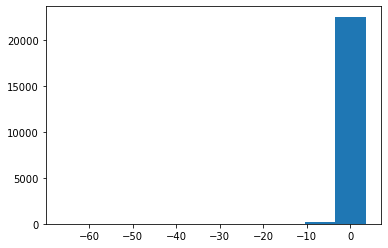

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, np.log(y))
residuals = np.log(y) - lm.predict(X)
plt.hist(residuals)

In [33]:
print('The R^2 of the new linear model is %.3f ' %(lm.score(X, np.log(y))))

The R^2 of the new linear model is 0.272 


### Test out Statspackage

In [34]:
import statsmodels.api as sm
x = sm.add_constant(X)
model = sm.OLS(np.log(y), x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     531.6
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:31:39   Log-Likelihood:                -30808.
No. Observations:               22730   AIC:                         6.165e+04
Df Residuals:                   22713   BIC:                         6.179e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                14.4254      0.11

In [35]:
pValues = results.pvalues
print('The significant coefficients')
pValues[pValues<0.05]

The significant coefficients


const            0.000000e+00
squareMeters     0.000000e+00
numberOfRooms    4.760035e-15
floors           5.008701e-05
attic            1.928350e-02
garage           1.857004e-58
hasGuestRoom     1.309680e-04
dtype: float64

In [36]:
print('The insignificant coefficients')
pValues[pValues>=0.05]

The insignificant coefficients


hasYard              0.160987
hasPool              0.698073
cityCode             0.436122
cityPartRange        0.748677
numPrevOwners        0.656741
made                 0.062005
isNewBuilt           0.081194
hasStormProtector    0.270197
basement             0.061443
hasStorageRoom       0.972540
dtype: float64

### Simple Split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

- - -

### Printing final, processed .csv(s): 

In [39]:
X.to_csv('./data/xtrain.csv')
y.to_csv('./data/ytrain.csv')
testPredict.to_csv('./data/xtest.csv')

- - -

- - -